In [3]:
import pandas as pd
check=pd.read_csv ('/home/gibran/project/opini/scrapper/raw_data/debat_tv_one.csv')
check

,author,text,published_at,like_count
0,user_33593,Buzzer,2025-06-01T17:55:31Z,0
1,user_24323,nasibmu lah silfester yg baik karena jilatanmu...,2025-06-01T17:47:18Z,0
2,user_19130,Roy udah gila manggap terus mulutnya,2025-06-01T16:47:52Z,0
3,user_45535,Negara luar udah memikirkan masa depan buat ke...,2025-06-01T15:29:03Z,0
4,user_24820,Kesini karena nonton si badut ternak mulyono,2025-06-01T14:32:12Z,0
...,...,...,...,...
18633,user_45143,"Sudahlah pak joko, isrtirahatlah dgn tenang..",2025-04-24T01:07:01Z,17
18634,user_30320,"First.. \n\npliss jgn dianggap sudah berlalu, ...",2025-04-24T01:06:42Z,287
18635,user_25246,Prabowo Presidenku❤,2025-04-24T01:06:23Z,0
18636,user_56706,Yang di tunggu-tunggu...,2025-04-24T01:06:02Z,2


In [7]:
from datetime import datetime
hours = [datetime.strptime(ts, "%Y-%m-%dT%H:%M:%SZ").hour for ts in check["published_at"]]

In [8]:
print(f"Total records: {len(hours)}")
print(f"Earliest hour: {min(hours)}")
print(f"Latest hour: {max(hours)}")
print(f"Average hour: {sum(hours)/len(hours):.1f}")

Total records: 18638
Earliest hour: 0
Latest hour: 23
Average hour: 9.8


In [9]:
hour_counts = {}
for hour in range(24):
    hour_counts[hour] = hours.count(hour)

# Display as a table
print("Hour | Count | Percentage")
print("---- | ----- | ---------")
for hour, count in sorted(hour_counts.items()):
    print(f"{hour:2d}   | {count:5d} | {count/len(hours)*100:.1f}%")

Hour | Count | Percentage
---- | ----- | ---------
 0   |   315 | 1.7%
 1   |   504 | 2.7%
 2   |  1060 | 5.7%
 3   |  1343 | 7.2%
 4   |  1151 | 6.2%
 5   |  1014 | 5.4%
 6   |  1103 | 5.9%
 7   |  1001 | 5.4%
 8   |   895 | 4.8%
 9   |   907 | 4.9%
10   |   849 | 4.6%
11   |   864 | 4.6%
12   |   913 | 4.9%
13   |  1079 | 5.8%
14   |  1132 | 6.1%
15   |  1161 | 6.2%
16   |   948 | 5.1%
17   |   701 | 3.8%
18   |   445 | 2.4%
19   |   307 | 1.6%
20   |   227 | 1.2%
21   |   222 | 1.2%
22   |   190 | 1.0%
23   |   307 | 1.6%


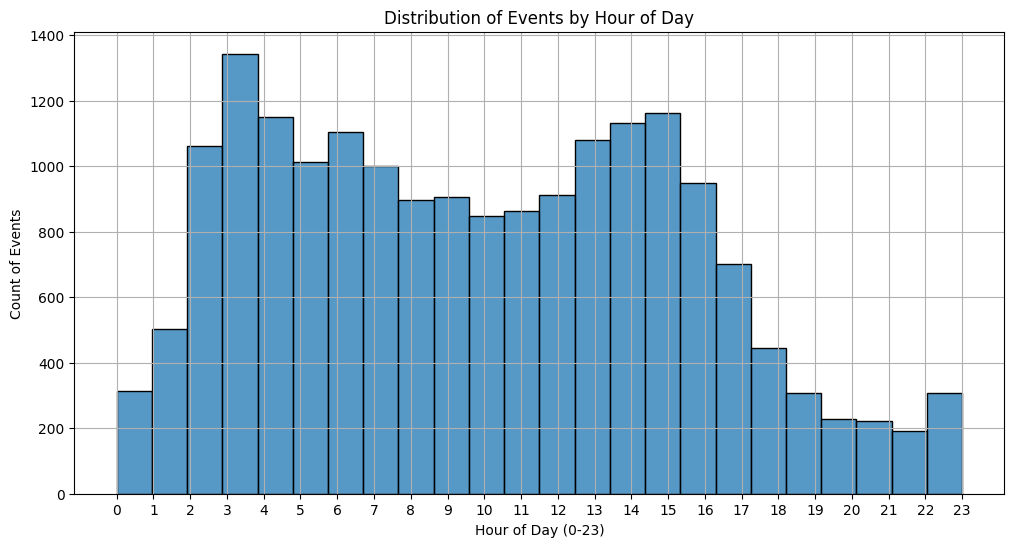

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(hours, bins=24, kde=False)
plt.title('Distribution of Events by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Count of Events')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [13]:
days = [datetime.strptime(ts, "%Y-%m-%dT%H:%M:%SZ").weekday() for ts in check["published_at"]]
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [15]:
day_counts = {}
for i, day in enumerate(day_names):
    day_counts[day] = days.count(i)

# Display as a table
print("Day       | Count | Percentage")
print("--------- | ----- | ---------")
for day, count in day_counts.items():
    print(f"{day:9} | {count:5d} | {count/len(days)*100:.1f}%")

Day       | Count | Percentage
--------- | ----- | ---------
Monday    |   614 | 3.3%
Tuesday   |   495 | 2.7%
Wednesday |   458 | 2.5%
Thursday  | 10015 | 53.7%
Friday    |  3212 | 17.2%
Saturday  |  2565 | 13.8%
Sunday    |  1279 | 6.9%


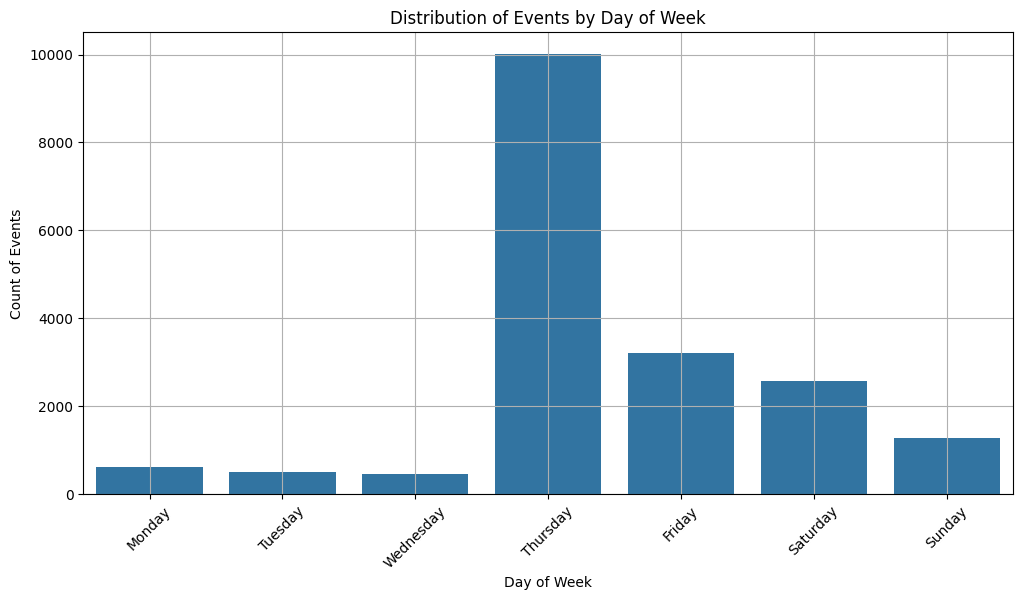

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(day_counts.keys()), y=list(day_counts.values()))
plt.title('Distribution of Events by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()